## Introduction: 

This notebook is devoted to the 3rd question in Chapter-1, regarding Pregnencies data exploration .. 

The website for the textbook provides code to process the data (called Survey.py) and we gonna use it in this exercice .. 

http://greenteapress.com/thinkstats/survey.py

and first.py 

http://greenteapress.com/thinkstats/first.py


Reusing code from survey.py and first.py, compute the standard deviation of gestation time for first babies and others. 

Does it look like the spread is the same for the two groups?

How big is the difference in the means compared to these standard deviations? What does this comparison suggest about the statistical significance of the difference?

In [72]:
import survey
import first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
t = first.MakeTables()
t[0], t[1], t[2]

(<survey.Pregnancies at 0x7f55eb66c7d0>,
 <survey.Pregnancies at 0x7f55eaf92110>)

In [44]:
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

len(original_table), len(firsts_table), len(others_table) ## same results 

(13593, 4413, 4735)

### 1. Std for preg_length for first babies:

In [62]:
first_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
     first_[i] = firsts_table.records[i].prglength   

In [63]:
first_

array([[ 39.],
       [ 39.],
       [ 38.],
       ..., 
       [ 39.],
       [ 34.],
       [ 39.]])

In [64]:
np.std(first_) 

2.7915850698243911

## Validation: 



In [65]:
m = np.mean(first_)
m

38.600951733514613

In [49]:
for i in first_:
    std_ = np.sqrt(sum(i - m)**2/(len(first_)-1))

In [50]:
std_

0.0060076922394329295

:O .. there is a huge difference between calculating std end to end and using the built in function .. 
I think this difference comes from the assumption that higher built in function results indicates that they ignore NAs in the calc, hence they are dividing in smaller n .. thus obtain large value .. 

I worked on the whole column with NAs cells are included in the length of the column (n) .. hence, dividing over larger n results in tiny value ! 

In [51]:
first_ = pd.DataFrame(first_)

In [52]:
first_.isnull().sum() ## It has not got NAs :S .. Assumption fails 

0    0
dtype: int64

The assumption of having NAs fails .. 
however, in the documentation .. 

http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=&subSec=8016&srtLabel=611931

They mentioned that about 9278 cases have prog_len from 27-50 weeks (around the mean value) .. 
and the rest (around only 4315 have length between 0 and 26 weeks) .. which is a little bit far from the mean value .. 

This might indicates that the mean best represents the data points in case no outliers exist .. 

mmm however, the docum. is talking about the preg_length for both first_babies and others not just first_babies !! :S 

I think now we can assure the results by:
1. writing the first_ data points on excel and calc std there and check if it if close to the built in fun or not .. 
2. plot data points to vistualize the existance of outliers and check its distribtion ..

In [67]:
np.savetxt('test.xlsx', first_, delimiter='\n') 

The data has been written on excel, then the std has been calculated there .. the std value there is (2.7919014147) .. which is so close to the result of the built in function std() in python ! :S

Final check is to draw these data .. 

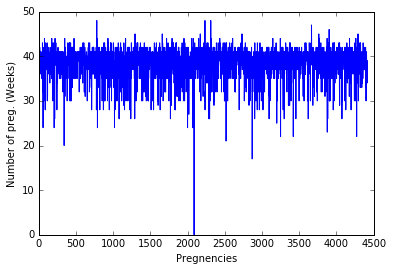

In [75]:
plt.plot(first_)
plt.xlabel('Pregnencies')
plt.ylabel('Number of preg. (Weeks)')

Is the case number 2002 is an outlier ?! 

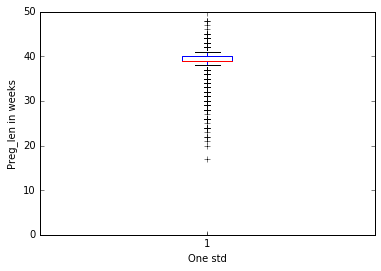

In [76]:
plt.boxplot(first_)
plt.xlabel('One std')
plt.ylabel('Preg_len in weeks')

the value of 1 means one stadanrd devation .. 

the data is nearly normaly distributed .. however, the data is scattered over a wide range i.e. from 17 to 50 .. 
with the majority of data below the median value (red line) .. this contradicts the documentation that states that the majority of the data is above is between 27 and 50 .. however, again we are talking here about the 1st babies only and the doc is talking about both 1st and others .. 

Hence, I think the built in function (and excel) results are more meaningful here with their higher std value .. due to the wide spread of these data points !